# Analysis on Online_Retail data for UK based market.

- From the Initial analysis, its understood that majority of the customer base is in UK with 94.32% of the total customers and total sales in UK constitutes about 87.63%.
- This shows further analysis for the UK is required to understand its customers and what possible future opportunities the UK market has to offer.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

# **Exploratory Data Analysis**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#load the treated dataset
df = pd.read_csv("/content/drive/MyDrive/new_file.csv")
#Take only the UK based transactions
df_uk = df[df['Country'] == 'United Kingdom']
#Cancellations are not needed for the analysis so they can be removed
df_uk = df_uk[~(df_uk['InvoiceNo'].str.contains('C'))]

In [4]:
#shape of the dataset
print("The shape of the dataset is: ", df_uk.shape)

The shape of the dataset is:  (349227, 16)


In [5]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Date,Year,Year_Month,Quarter,Month,Day,Hour,UnitPrice,CustomerID,Country,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2010-12-01,2010,2010-12,4,12,2,8,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2010-12-01,2010,2010-12,4,12,2,8,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2010-12-01,2010,2010-12,4,12,2,8,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,2010-12-01,2010,2010-12,4,12,2,8,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,2010-12-01,2010,2010-12,4,12,2,8,3.39,17850,United Kingdom,20.34


In [6]:
df_uk.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Date,Year,Year_Month,Quarter,Month,Day,Hour,UnitPrice,CustomerID,Country,Total_Price
401584,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,2011-12-09,2011,2011-12,4,12,4,12,1.95,15804,United Kingdom,23.4
401585,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2011-12-09,2011,2011-12,4,12,4,12,2.95,13113,United Kingdom,23.6
401586,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,2011-12-09,2011,2011-12,4,12,4,12,1.25,13113,United Kingdom,30.0
401587,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,2011-12-09,2011,2011-12,4,12,4,12,8.95,13113,United Kingdom,214.8
401588,581586,20685,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,2011-12-09,2011,2011-12,4,12,4,12,7.08,13113,United Kingdom,70.8


### Summary of the dataset

In [7]:
df_uk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349227 entries, 0 to 401588
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    349227 non-null  object 
 1   StockCode    349227 non-null  object 
 2   Description  349227 non-null  object 
 3   Quantity     349227 non-null  int64  
 4   InvoiceDate  349227 non-null  object 
 5   Date         349227 non-null  object 
 6   Year         349227 non-null  int64  
 7   Year_Month   349227 non-null  object 
 8   Quarter      349227 non-null  int64  
 9   Month        349227 non-null  int64  
 10  Day          349227 non-null  int64  
 11  Hour         349227 non-null  int64  
 12  UnitPrice    349227 non-null  float64
 13  CustomerID   349227 non-null  int64  
 14  Country      349227 non-null  object 
 15  Total_Price  349227 non-null  float64
dtypes: float64(2), int64(7), object(7)
memory usage: 45.3+ MB


In [8]:
Features = df_uk.columns

# Creating a DataFrame with useful information about dataset
data_info = pd.DataFrame()
data_info['Features'] = Features
data_info['unique_values'] = [df_uk[col].nunique() for col in Features]
data_info['total_null'] = [df_uk[col].isnull().sum() for col in Features]
data_info['null_percent'] = [df_uk[col].isnull().sum() * 100 / len(df_uk) for col in Features]

data_info.style.background_gradient()

,Features,unique_values,total_null,null_percent
0,InvoiceNo,16649,0,0.000000
1,StockCode,3645,0,0.000000
2,Description,3844,0,0.000000
3,Quantity,294,0,0.000000
4,InvoiceDate,15615,0,0.000000
5,Date,305,0,0.000000
6,Year,2,0,0.000000
7,Year_Month,13,0,0.000000
8,Quarter,4,0,0.000000
9,Month,12,0,0.000000


In [9]:
df_uk.describe()

,Quantity,Year,Quarter,Month,Day,Hour,UnitPrice,CustomerID,Total_Price
count,349227.000000,349227.000000,349227.000000,349227.000000,349227.000000,349227.000000,349227.000000,349227.000000,349227.000000
mean,12.181295,2010.932826,2.862639,7.635163,2.633768,12.803704,2.972124,15548.333625,20.860428
std,191.797470,0.250324,1.120697,3.416509,1.951522,2.246193,17.990307,1594.403077,328.406035
min,1.000000,2010.000000,1.000000,1.000000,0.000000,6.000000,0.000000,12346.000000,0.000000
25%,2.000000,2011.000000,2.000000,5.000000,1.000000,11.000000,1.250000,14191.000000,4.200000
50%,4.000000,2011.000000,3.000000,9.000000,2.000000,13.000000,1.950000,15518.000000,10.200000
75%,12.000000,2011.000000,4.000000,11.000000,4.000000,14.000000,3.750000,16931.000000,17.850000
max,80995.000000,2011.000000,4.000000,12.000000,6.000000,20.000000,8142.750000,18287.000000,168469.600000


In [10]:
# There are Transactions with unit price zero. This has to be analysed.
df_uk[df_uk['UnitPrice'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Date,Year,Year_Month,Quarter,Month,Day,Hour,UnitPrice,CustomerID,Country,Total_Price
22619,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,2010-12-16,2010,2010-12,4,12,3,14,0.0,16560,United Kingdom,0.0
29374,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,2011-01-06,2011,2011-01,1,1,3,16,0.0,13081,United Kingdom,0.0
29376,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,2011-01-06,2011,2011-01,1,1,3,16,0.0,13081,United Kingdom,0.0
34903,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,2011-01-13,2011,2011-01,1,1,3,15,0.0,15107,United Kingdom,0.0
54482,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,2011-02-10,2011,2011-02,1,2,3,13,0.0,17560,United Kingdom,0.0
86760,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,2011-03-23,2011,2011-03,1,3,2,10,0.0,13239,United Kingdom,0.0
93947,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,2011-03-30,2011,2011-03,1,3,2,12,0.0,13113,United Kingdom,0.0
98634,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,2011-04-04,2011,2011-04,2,4,0,14,0.0,14410,United Kingdom,0.0
130286,553000,47566,PARTY BUNTING,4,2011-05-12 15:21:00,2011-05-12,2011,2011-05,2,5,3,15,0.0,17667,United Kingdom,0.0
197297,561284,22167,OVAL WALL MIRROR DIAMANTE,1,2011-07-26 12:24:00,2011-07-26,2011,2011-07,3,7,1,12,0.0,16818,United Kingdom,0.0


In [11]:
df_uk[df_uk['InvoiceNo'] == '539263']['Total_Price'].sum()

332.18

## **Observations**
- Consider the Invoice 539263, though it has a product purchased for zero units, there are other products bought in the same order and Total order value is 332 units. Hence, it could be an discounted product.

- These records are transactional level records, so, analysis on each customers had to be done why the minimum value of Unit price is zero even after removing cancelled orders.

In [12]:
# Find the minimum purchase value for each customer
df_uk.groupby('CustomerID')['Total_Price'].sum().sort_values().head()

CustomerID
13256     0.00
16738     3.75
14792     6.20
16454     6.90
17956    12.75
Name: Total_Price, dtype: float64

In [13]:
df_uk[df_uk['CustomerID'] == 13256]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Date,Year,Year_Month,Quarter,Month,Day,Hour,UnitPrice,CustomerID,Country,Total_Price
374208,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,2011-11-25,2011,2011-11,4,11,4,15,0.0,13256,United Kingdom,0.0


In [14]:
df_uk[(df_uk['StockCode'] == '84826') & (df_uk['Date'] == '2011-11-25')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Date,Year,Year_Month,Quarter,Month,Day,Hour,UnitPrice,CustomerID,Country,Total_Price
374208,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,2011-11-25,2011,2011-11,4,11,4,15,0.0,13256,United Kingdom,0.0


## **Observations**
- The customer id 13256 had bought only one product (12540 qty) for Total price zero. 

- Apparently on the same day there was no other sales for this stock code other than this transaction. So, this had to be a data entry issue. Hence, removing this customer.

In [15]:
# Remove the 13256 customer
df_uk = df_uk[df_uk['CustomerID'] != 13256]
df_uk.CustomerID.nunique()

3920

## **The average number of orders per customer**

In [16]:
# get unique InvoiceNo number per customer
df_uk.groupby('CustomerID')['InvoiceNo'].nunique().describe()

count    3920.000000
mean        4.246939
std         7.206483
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       210.000000
Name: InvoiceNo, dtype: float64

#### **Observations**
- The average number of orders per customer is 4 orders.

### **The average number of unique items per order**

In [17]:
df_uk.groupby('InvoiceNo')['StockCode'].nunique().describe()

count    16648.000000
mean        20.690413
std         23.946463
min          1.000000
25%          6.000000
50%         15.000000
75%         27.000000
max        541.000000
Name: StockCode, dtype: float64

#### **Observations**
- The average number of unique items per order is 20 products.

## **Number by products per invoice by each customer**

In [18]:
temp_df =df_uk.groupby(['InvoiceNo','CustomerID'],as_index=False)['InvoiceDate'].count()
transaction_df = temp_df.rename(columns = {'InvoiceDate':'Number of products'})
transaction_df.head()

,InvoiceNo,CustomerID,Number of products
0,536365,17850,7
1,536366,17850,2
2,536367,13047,12
3,536368,13047,4
4,536369,13047,1


In [19]:
transaction_df.describe()

,CustomerID,Number of products
count,16648.000000,16648.000000
mean,15507.675396,20.977054
std,1626.311975,24.527607
min,12346.000000,1.000000
25%,14097.500000,6.000000
50%,15498.000000,15.000000
75%,16923.000000,27.000000
max,18287.000000,542.000000


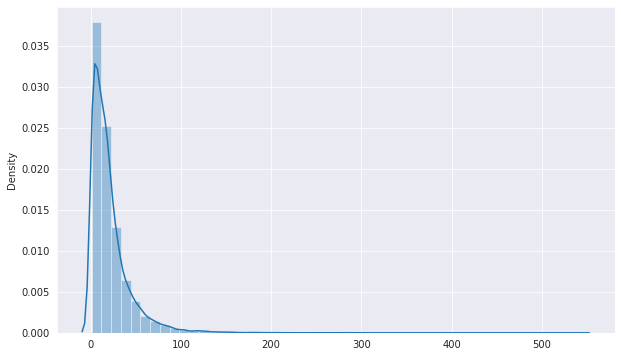

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.distplot(x=transaction_df['Number of products'],ax=ax)
plt.show()

#### **Observations**
- The distribution is skewed. Most people **buy less than 27 items**.

## **Year_Month Sales Trend**

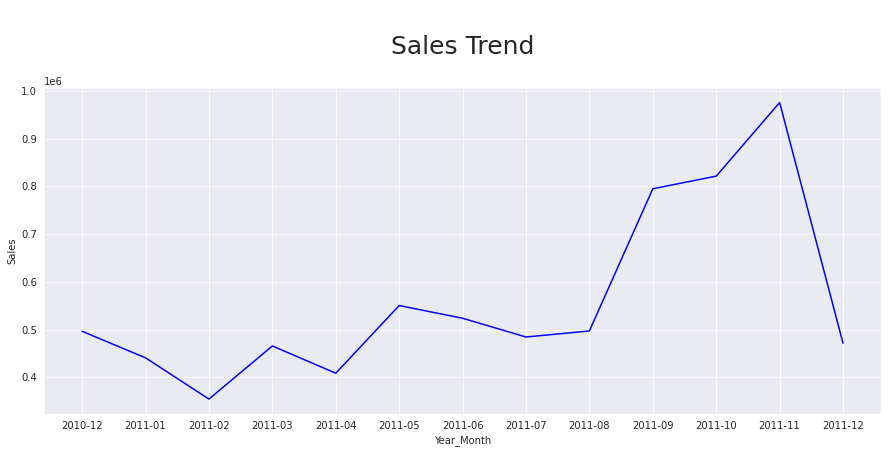

In [21]:
plt.figure(figsize=(15,6))
plt.plot(df_uk.groupby(['Year_Month'])['Total_Price'].sum(), color='b')
plt.ylabel('Sales')
plt.xlabel('Year_Month')
plt.title("\n Sales Trend \n", size=25)
plt.show()

#### **Observations**
- Sales is high during the month of **November** which could be for various reasons such as Christmas, Thanksgiving and Black Friday sales.
- There is an increasing Trend in the sales and peaks and troughs are seen.

## **Top 10 most bought Products in UK**

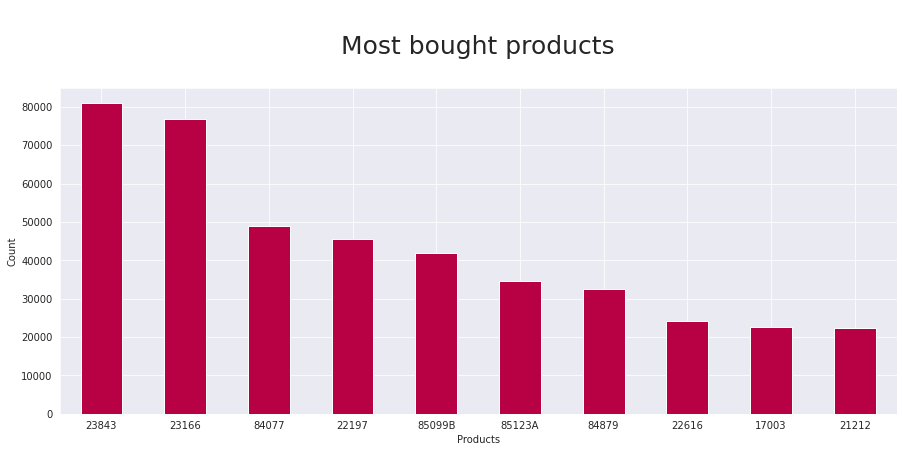

In [22]:
plt.figure(figsize=(15,6))
df_uk.groupby('StockCode')['Quantity'].sum().nlargest(10).plot(kind='bar',color = '#b80045')
plt.xticks(rotation='horizontal')
plt.ylabel('Count')
plt.xlabel('Products')
plt.title("\n Most bought products \n", size=25)
plt.show()

# **Website/Internet business Valuation metrics**

https://corporatefinanceinstitute.com/resources/knowledge/valuation/startup-valuation-metrics-internet/

## **Monthly Active/Unique Customers**

In [23]:
monthly_unique = df_uk.groupby('Year_Month')['CustomerID'].nunique()

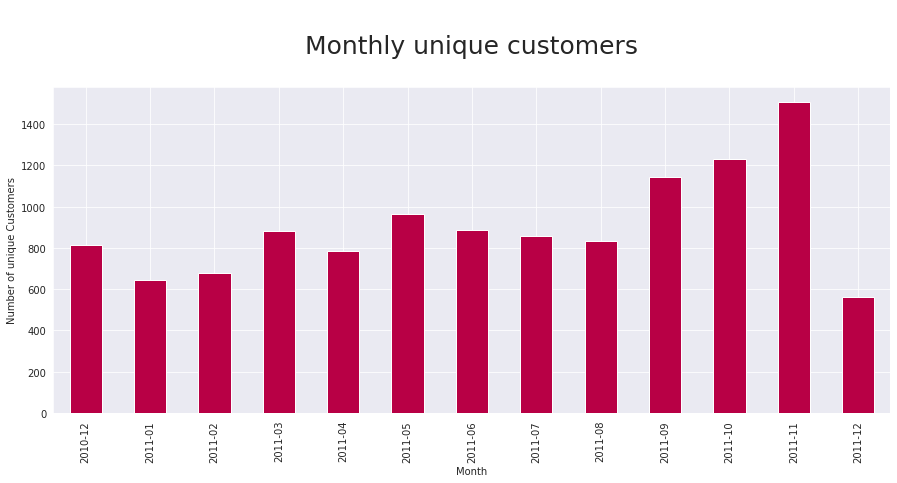

In [24]:
plt.figure(figsize=(15,6))
monthly_unique.plot(kind='bar',color = '#b80045')
plt.ylabel('Number of unique Customers')
plt.xlabel('Month')
plt.title("\n Monthly unique customers \n", size=25)
plt.show()

In [25]:
monthly_unique.describe()

count      13.000000
mean      906.923077
std       257.285659
min       560.000000
25%       784.000000
50%       859.000000
75%       962.000000
max      1505.000000
Name: CustomerID, dtype: float64

In [26]:
(monthly_unique/df_uk['CustomerID'].nunique()*100).to_frame()

,CustomerID
Year_Month,
2010-12,20.790816
2011-01,16.505102
2011-02,17.321429
2011-03,22.448980
2011-04,20.000000
2011-05,24.540816
2011-06,22.678571
2011-07,21.913265
2011-08,21.275510


#### **Observations**
- Monthly active users depicts how big the company's audience are and how much they could potentially earn. 
- During November, the festive season, number of customers are more around **1505** and on minimum there are about 560 customers.
- Out of **3920** unique users in UK, **38%** of them visited during the month of **November**.

## **Monthly sales**

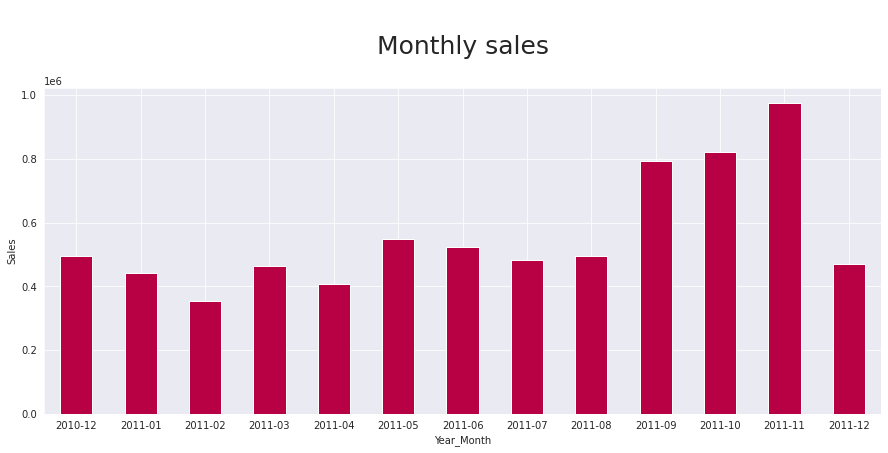

In [27]:
plt.figure(figsize=(15,6))
df_uk.groupby('Year_Month')['Total_Price'].sum().plot(kind='bar',color = '#b80045')
plt.xticks(rotation='horizontal')
plt.ylabel('Sales')
plt.title("\n Monthly sales \n", size=25)
plt.show()

#### **Observations**
- There is a high sales in the month of November which could be due to festivites and black friday sales.
- Q1 sales had to be improved by extending offers or discounts at the beginning of the year.

## **What is MoM? (Month over month)**


In [28]:
MoM_Data = pd.DataFrame(df_uk.groupby('Year_Month')['Total_Price'].sum())
MoM_Data.columns = ['Sales']
MoM_Data.head()

,Sales
Year_Month,
2010-12,496477.340
2011-01,440876.330
2011-02,354618.200
2011-03,465784.190
2011-04,408733.111


In [29]:
MoM_Data['Last_Month'] = np.roll(MoM_Data['Sales'],1)
MoM_Data.head()

,Sales,Last_Month
Year_Month,,
2010-12,496477.340,471381.82
2011-01,440876.330,496477.34
2011-02,354618.200,440876.33
2011-03,465784.190,354618.20
2011-04,408733.111,465784.19


In [30]:
#Now, since the MoM first month cannot be found since we donot have it's previous month value.
#By default, a junk value has been put in the last value and rolled up over there. SO we need to remove that.
MoM_Data = MoM_Data.drop(MoM_Data.index[0])
MoM_Data.head()

,Sales,Last_Month
Year_Month,,
2011-01,440876.330,496477.340
2011-02,354618.200,440876.330
2011-03,465784.190,354618.200
2011-04,408733.111,465784.190
2011-05,550359.350,408733.111


In [31]:
#Calculating MoM Growth for each month
MoM_Data['Growth'] = (MoM_Data['Sales']/MoM_Data['Last_Month'])-1
MoM_Data

,Sales,Last_Month,Growth
Year_Month,,,
2011-01,440876.330,496477.340,-0.111991
2011-02,354618.200,440876.330,-0.195652
2011-03,465784.190,354618.200,0.313481
2011-04,408733.111,465784.190,-0.122484
2011-05,550359.350,408733.111,0.346501
2011-06,523775.590,550359.350,-0.048303
2011-07,484545.591,523775.590,-0.074898
2011-08,497194.910,484545.591,0.026106
2011-09,794806.692,497194.910,0.598582


In [32]:
##Plotting MoM Growth
MoM_plot = MoM_Data.drop(columns = ["Sales", "Last_Month"])
MoM_plot['Months'] = MoM_plot.index
MoM_plot.reset_index(drop=True, inplace=True)
MoM_plot.head()

,Growth,Months
0,-0.111991,2011-01
1,-0.195652,2011-02
2,0.313481,2011-03
3,-0.122484,2011-04
4,0.346501,2011-05


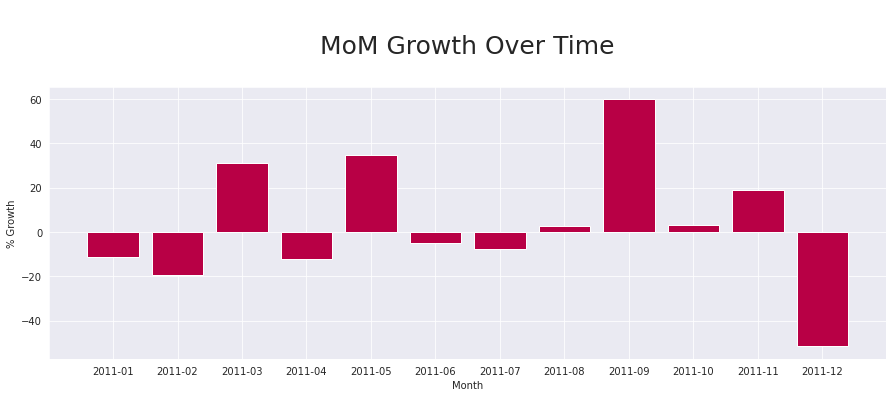

In [33]:
plt.figure(figsize=(15,5))
plt.bar(MoM_plot['Months'],MoM_plot['Growth']*100,color = '#b80045')
plt.ylabel('% Growth')
plt.xlabel('Month')
plt.title("\n MoM Growth Over Time \n", size=25)
plt.show()

#### **Observations**
- Though the number of customers and sales is high in the month November, 
its clear that there has been a gradual increase and not sudden spike from october to november. 
- This suggests that customers have been shopping for the festive season from the month of september as there is a sudden MoM growth in the month 9 with **59% increase in sales compared to August**.
- The suggestion would be to provide an Early bird offer from the month of September to stabilize and increase the sales more.

## **Month wise - Percentage of new users**

In [34]:
def monthly_new_users():
  last = pd.DataFrame(df_uk[df_uk['Year_Month'] == '2010-12']['CustomerID'].unique(),columns=['cust_id'])
  l = [0]
  for i in df_uk[df_uk['Year_Month'] > '2010-12'].Year_Month.unique():
    dummy = pd.DataFrame(df_uk[df_uk['Year_Month'] == i]['CustomerID'].unique(),columns=['cust_id'])
    l.append(len((set(dummy['cust_id']))-set(last['cust_id'])))
    last = last.append(dummy,ignore_index=True).drop_duplicates()
  return l

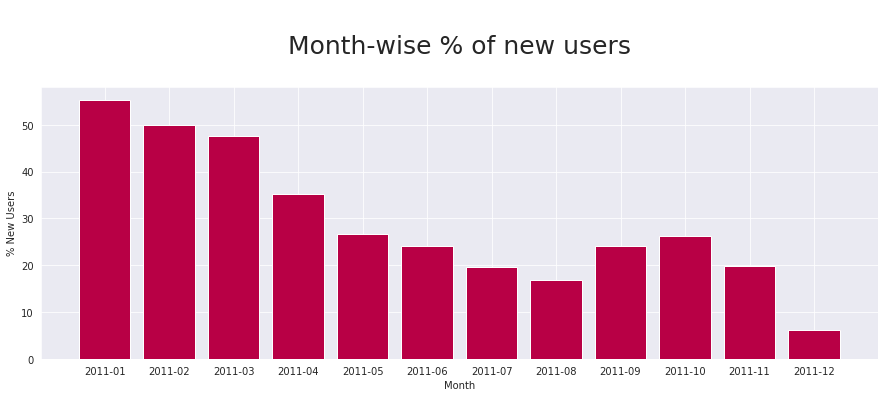

In [35]:
CCR = monthly_unique.to_frame()
CCR.columns = ['Unique_users']
CCR['New_users'] = monthly_new_users()
# dropping 2010-12 as it doesn't have previous month's data to find new users
CCR = CCR.drop(CCR.index[0])
# Percentage of new users made purchase every month
CCR['Percent_new_users'] = (CCR['New_users']/CCR['Unique_users'])*100
plt.figure(figsize=(15,5))
plt.bar(CCR.index,CCR['Percent_new_users'], color = '#b80045')
plt.ylabel('% New Users')
plt.xlabel('Month')
plt.title("\n Month-wise % of new users \n", size=25)
plt.show()

In [36]:
CCR.describe()

,Unique_users,New_users,Percent_new_users
count,12.000000,12.00000,12.000000
mean,914.583333,258.75000,29.320485
std,267.173236,105.71241,14.859471
min,560.000000,34.00000,6.071429
25%,757.750000,202.75000,19.719174
50%,869.500000,276.50000,25.212617
75%,1008.000000,328.00000,38.402134
max,1505.000000,419.00000,55.332303


#### **Observations**
- In the start of the year, **55%** of the users are new users.
- The first three months of Q4 which generates more revenue to the business, has comparatively less new customers compared to Q1.
- Customer Conversions in Q4 can be improved and new customers can be brought that way sales can be improved.

## **Month-wise Average Order Value**

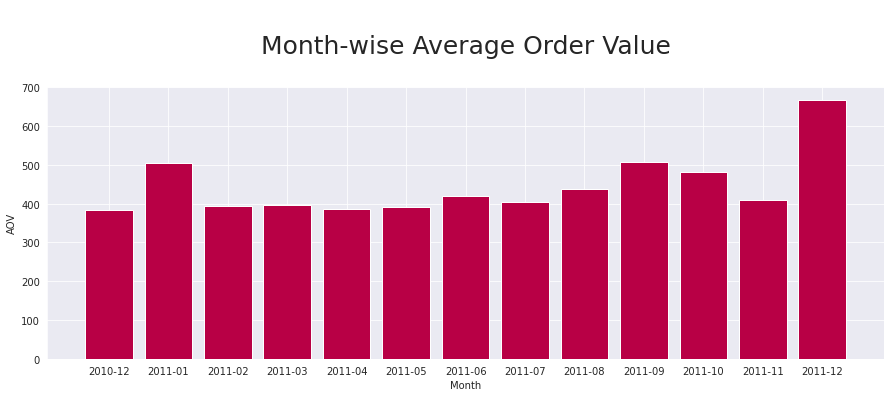

In [37]:
MAOV = (df_uk.groupby('Year_Month')['Total_Price'].sum()/df_uk.groupby('Year_Month')['InvoiceNo'].nunique()).to_frame()
MAOV.columns = ['Avg_Order_Value']
plt.figure(figsize=(15,5))
plt.bar(MAOV.index,MAOV['Avg_Order_Value'], color = '#b80045')
plt.ylabel('AOV')
plt.xlabel('Month')
plt.title("\n Month-wise Average Order Value \n", size=25)
plt.show()

In [38]:
MAOV.describe()

,Avg_Order_Value
count,13.000000
mean,445.022709
std,79.963392
min,384.568040
25%,395.338016
50%,408.739057
75%,481.654035
max,667.679632


## **Observations**
- During the month of **December** 2011, the average amount of money each customer spends per transaction is high which is about **667** units.
-  A lower AOV usually indicates that the seller's customers prefer to make small purchases with each order.
- AOV of November are lower because of busy sales periods, with the volume of orders brought down the average.
- AOV has to be increased for a company to improve profits and revenue growth.

## **Month-wise Average Basket size**

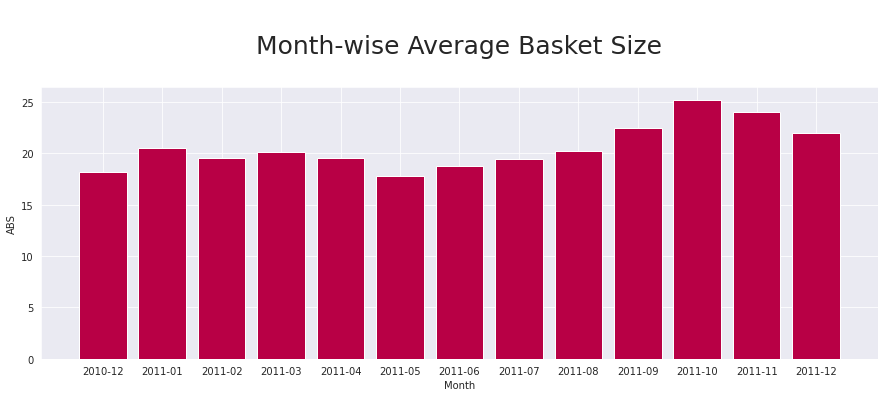

In [39]:
MABS = (df_uk[df_uk['Quantity']>0].groupby('Year_Month')['InvoiceNo'].count()/df_uk[df_uk['Quantity']>0].groupby('Year_Month')['InvoiceNo'].nunique()).to_frame()
MABS.columns = ['Avg_Basket_Size']
plt.figure(figsize=(15,5))
plt.bar(MABS.index,MABS['Avg_Basket_Size'], color = '#b80045')
plt.ylabel('ABS')
plt.xlabel('Month')
plt.title("\n Month-wise Average Basket Size \n", size=25)
plt.show()

In [40]:
MABS.describe()

,Avg_Basket_Size
count,13.000000
mean,20.609221
std,2.235288
min,17.789736
25%,19.466667
50%,20.145285
75%,21.987252
max,25.217009


#### **Observations**
- During last Quarter, the number of items getting sold in a single order is more compared to the rest.
- The bigger the basket size on an individual customer the better for the business, thus high clearance which enhance turnover performance, profitability and customer shopping experience. 

## **Month-wise Average revenue per user**

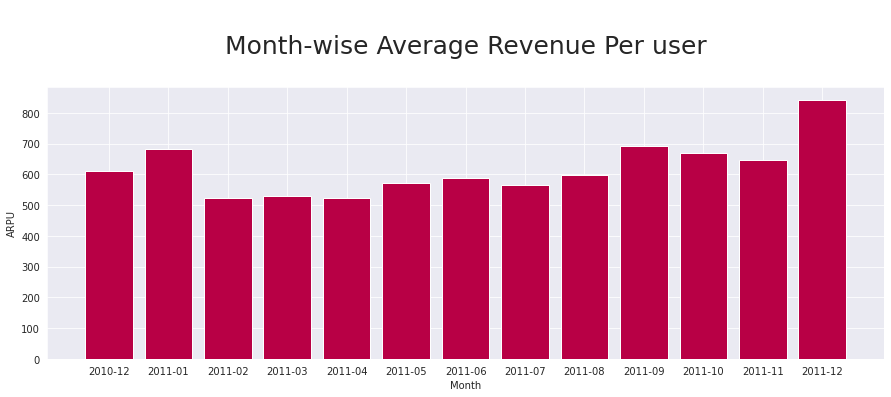

In [41]:
ARPU = (df_uk.groupby('Year_Month')['Total_Price'].sum()/df_uk.groupby('Year_Month')['CustomerID'].nunique()).to_frame()
ARPU.columns = ['Avg_revenue_per_user']
plt.figure(figsize=(15,5))
plt.bar(ARPU.index,ARPU['Avg_revenue_per_user'], color = '#b80045')
plt.ylabel('ARPU')
plt.xlabel('Month')
plt.title("\n Month-wise Average Revenue Per user \n", size=25)
plt.show()

In [42]:
ARPU.describe()

,Avg_revenue_per_user
count,13.000000
mean,618.152218
std,89.413019
min,521.343254
25%,564.081014
50%,596.156966
75%,667.658642
max,841.753250


#### **Observations**
- ARPU average revenue received per user over a month . 
- High ARPU suggests that the company has a product that's driving a better value ratio.
- During the month of December the ARPU is high with 841 units.

## **Monthly Retention Rate**

In [43]:
def monthly_retained_users():
  last = pd.DataFrame(df_uk[df_uk['Year_Month'] == '2010-12']['CustomerID'].unique(),columns=['cust_id'])
  l = [0]
  for i in df_uk[df_uk['Year_Month'] > '2010-12'].Year_Month.unique():
    dummy = pd.DataFrame(df_uk[df_uk['Year_Month'] == i]['CustomerID'].unique(),columns=['cust_id'])
    l.append(len(set(dummy['cust_id']).intersection(set(last['cust_id']))))
    last = dummy
  return l

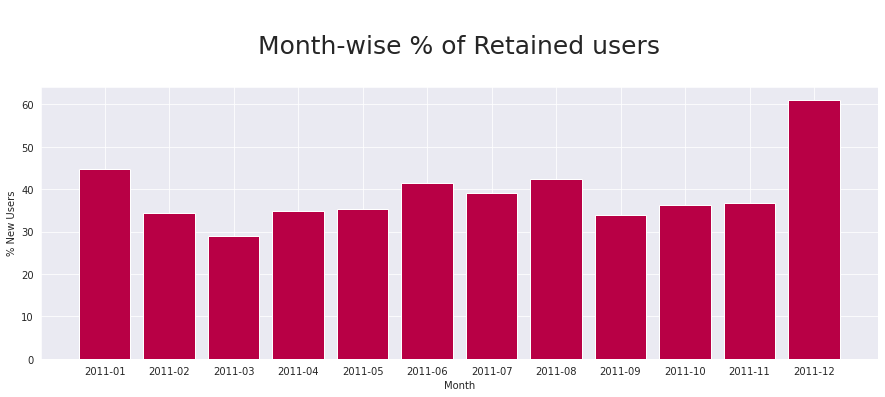

In [44]:
MRR = monthly_unique.to_frame()
MRR.columns = ['Unique_users']
MRR['Retained_users'] = monthly_retained_users()
# dropping 2010-12 as it doesn't have previous month's data to find retained users
MRR = MRR.drop(MRR.index[0])
# Percentage of retained users who made purchase previous month
MRR['Percent_new_users'] = (MRR['Retained_users']/MRR['Unique_users'])*100
plt.figure(figsize=(15,5))
plt.bar(MRR.index,MRR['Percent_new_users'], color = '#b80045')
plt.ylabel('% New Users')
plt.xlabel('Month')
plt.title("\n Month-wise % of Retained users \n", size=25)
plt.show()

In [45]:
MRR.describe()

,Unique_users,Retained_users,Percent_new_users
count,12.000000,12.000000,12.000000
mean,914.583333,348.000000,39.074670
std,267.173236,87.991735,8.149153
min,560.000000,233.000000,28.863636
25%,757.750000,285.250000,34.790527
50%,869.500000,341.000000,36.494747
75%,1008.000000,373.000000,41.657630
max,1505.000000,554.000000,61.071429


## **Observations**

- Retention rate should be monitored very closely because it indicates how sticky is your service and how well your product fits the market. For understanding, Monthly Retention Rate, we need to calculate how many customers retained from previous month.

- Every month, there are more than 233 customers who are retained from previous month. **61%** of customers are retained in the month of December.

- In the month of November, the customer retention is less than December, yet high sales is because of many new customers.

## **Pareto Principle**
- The **Pareto Principle (the 80/20 rule)** that tells **80% of effects come from 20% of causes**. This principle can be applied universally to almost any situation where there is an uneven distribution. We use here to identify that top 20% of customers and focus the marketing on that market segment.

- There doesn’t have to be an actual 80-20 split in the distribution. The main idea behind the principle is just to recognize that a small number of cases produce a large percentage of the effect.

In [46]:
#The 80% of the revenue
_80_percent_revenue = df_uk['Total_Price'].sum()*0.8
print('80% of Total Revenue is',_80_percent_revenue)

80% of Total Revenue is 5828019.7151999995


In [47]:
# Total Revenue per Customer 
Revenue_per_customer = df_uk.groupby('CustomerID')['Total_Price'].sum().sort_values(ascending=False).reset_index()
Revenue_per_customer

,CustomerID,Total_Price
0,18102,259657.30
1,17450,194390.79
2,16446,168472.50
3,17511,91062.38
4,16029,80850.84
...,...,...
3915,16878,13.30
3916,17956,12.75
3917,16454,6.90
3918,14792,6.20


In [48]:
# Filter top 20% of the customers and 
print('Revenue Generated by top 20 customers is',Revenue_per_customer.head(round(3920*0.2))['Total_Price'].sum())

Revenue Generated by top 20 customers is 5345220.561


## **Observations**
- As said, there is no actual 80-20 split as expected, yet, the top 20% of the customers generate a revenue is somewhat close to the 80% of the total Revenue.

## **Modelling perspective**

- Further, the principle of Pareto can be applied to RFM segmentation which says that 80% of total results are driven by the top 20% causes. When applied to marketing, it means that 80% of your total sales are likely to come from your top 20% of users. Customers who spent once are more likely to spend again, Customers who make big ticket purchases are more likely to repeat them and provide personalised marketing strategies. Also, these customers are highly critical for business performance, so retention should be focused.

- By segmenting customers and identifying the critical customers is likely to give you much higher return on investment. 